In [1]:
import gpflow
import gpflux2 as gpflux
from gpflux2.helpers import construct_basic_kernel, construct_basic_inducing_variables
from gpflux2.initializers import ZeroOneInitializer
from gpflux2.layers import GPLayer
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from plotting import plot_layers

In [2]:
Ns = 1000
D = 1
a, b = 0, 1
X = np.linspace(a, b, 1000).reshape(-1, 1)

In [3]:
Z = X.copy()
M = Z.shape[0]

# Layer 1
feat1 = construct_basic_inducing_variables(M, D, D)
kern1 = construct_basic_kernel(gpflow.kernels.SquaredExponential(lengthscale=0.15),
                               output_dim=D, share_hyperparams=True)
layer1 = GPLayer(kern1, feat1, initializer=ZeroOneInitializer(Z))

# Layer 2
feat2 = construct_basic_inducing_variables(M, D, D)
kern2 = construct_basic_kernel(gpflow.kernels.SquaredExponential(lengthscale=0.8, variance=0.1),
                               output_dim=D, share_hyperparams=True)
layer2 = GPLayer(kern2, feat2, initializer=ZeroOneInitializer(Z))

# Layer 3
feat3 = construct_basic_inducing_variables(M, D, D)
kern3 = construct_basic_kernel(gpflow.kernels.SquaredExponential(lengthscale=0.3, variance=0.1),
                               output_dim=D, share_hyperparams=True)
layer3 = GPLayer(kern3, feat3, initializer=ZeroOneInitializer(Z))

gp_layers = [layer1, layer2, layer3]
for layer in gp_layers:
    layer.build([None, D])

In [4]:
# model = gpflux.DeepGP(np.empty((1, 1)), np.empty((1, 1)), [layer1, layer2, layer3])

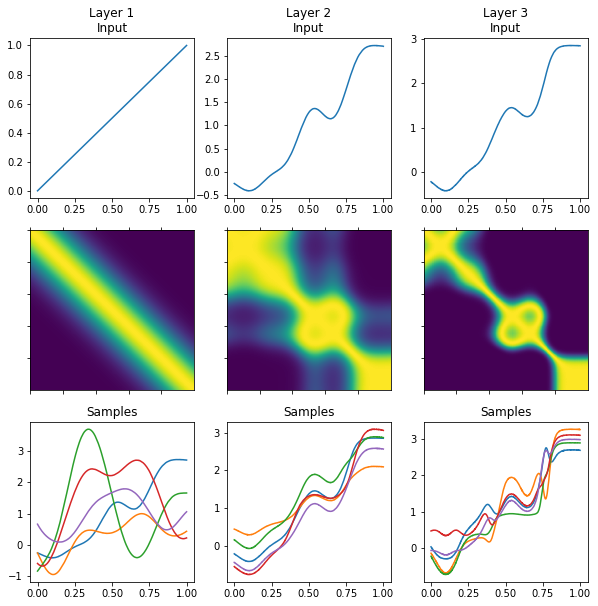

In [5]:
plot_layers(X, gp_layers)

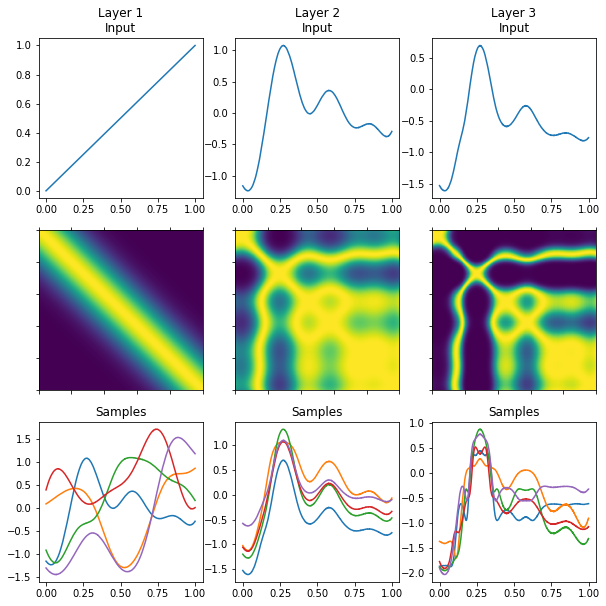

In [4]:
plot_layers(X, model)
plt.show()